## Курсовой проект по курсу "Библиотеки Python для Data Science: продолжение"
### студент Абрамов А.В.

In [162]:
# Импортируем необходимые библиотеки:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [163]:
# Формируем датафреймы:
train = pd.read_csv('course_project_train.csv')
test = pd.read_csv('course_project_test.csv')

In [164]:
train.shape

(7500, 17)

In [165]:
test.shape

(2500, 16)

In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

*Замечаем, что признак Months since last delinquent в более половины строк имеет значение NaN => его можно дропнуть. Что касается других признаков, имеющих значения NaN, то проверим их корреляцию с близкими признаками. В случае высокой взаимной корреляции с каким-либо из них, признаки можно дропнуть. Иначе - заменить NaN на медианное значение*

In [167]:
train.drop(['Months since last delinquent'], axis=1, inplace=True)
test.drop(['Months since last delinquent'], axis=1, inplace=True)

In [168]:
train.head(3)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0


In [169]:
test.head(3)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0


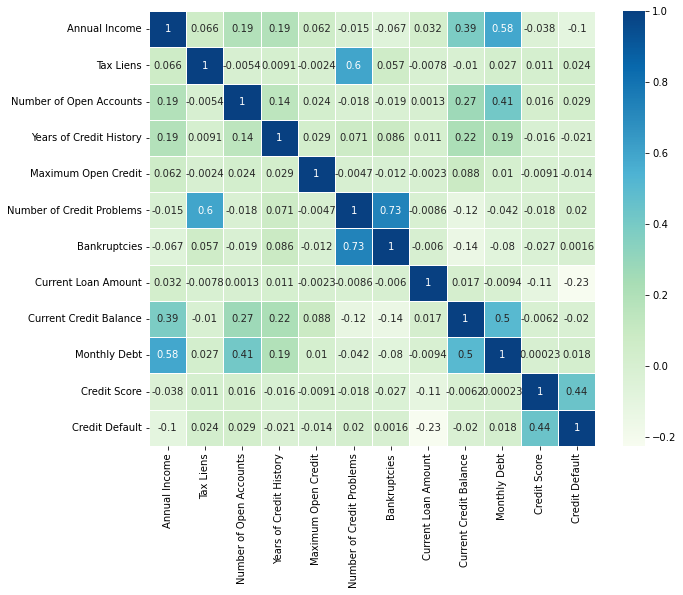

In [170]:
# Построим тепловую карту таблицы корелляции числовых признаков

plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, cmap='GnBu')
plt.show()

*Признак Annual Income, имеющий 20% значений NaN, особо ни с каким другим не коррелирует, но он важен, и поэтому значения NaN заменим на медианное значение. Заметим, что признак Credit Score имеет значения NaN в тех же самых случаях, что и признак Annual Income, однако больше коррелирует с целевой переменной. Значения NaN признака Credit Score также заменим на медианное значение*

In [171]:
train.fillna(train['Annual Income'].median(), inplace=True)
train.fillna(train['Credit Score'].median(), inplace=True)
test.fillna(train['Annual Income'].median(), inplace=True)
test.fillna(train['Credit Score'].median(), inplace=True)

In [172]:
train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7.500000e+03,7.500000e+03,7.500000e+03,7500.000000,7.500000e+03,7500.000000
mean,1.325286e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,2.181104e+03,1.187318e+07,2.898332e+05,18314.454133,2.434691e+05,0.281733
std,7.567551e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,5.043627e+04,3.192612e+07,3.178714e+05,11926.764673,4.734511e+05,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000e+00,1.124200e+04,0.000000e+00,0.000000,5.850000e+02,0.000000
25%,9.311330e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000e+00,1.801690e+05,1.142565e+05,10067.500000,7.180000e+02,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000e+00,3.095730e+05,2.093230e+05,16076.500000,7.380000e+02,0.000000
75%,1.499974e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,0.000000e+00,5.198820e+05,3.604062e+05,23818.000000,6.930000e+03,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,1.168386e+06,1.000000e+08,6.506797e+06,136679.000000,1.168386e+06,1.000000


*Просмотрим какие значения и как часто встречаются в категориальных признаках: Years in current job, Home Ownership, Purpose, Term*

In [173]:
train['Years in current job'].value_counts() # этот признак следует дропнуть!

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
1168386.0     371
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [174]:
train.drop(['Years in current job'], axis=1, inplace=True)
test.drop(['Years in current job'], axis=1, inplace=True)

In [175]:
train['Home Ownership'].value_counts() # можно кодировать

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [176]:
train['Purpose'].value_counts() # можно кодировать

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [177]:
train['Term'].value_counts() # тоже можно кодировать

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [178]:
le = LabelEncoder() # кодируем эти признаки!

In [179]:
le.fit(train['Home Ownership'])
train['Home Ownership'] = le.transform(train['Home Ownership'])
test['Home Ownership'] = le.transform(test['Home Ownership'])

In [180]:
le.fit(train['Purpose'])
train['Purpose'] = le.transform(train['Purpose'])
test['Purpose'] = le.transform(test['Purpose'])

In [181]:
le.fit(train['Term'])
train['Term'] = le.transform(train['Term'])
test['Term'] = le.transform(test['Term'])

In [182]:
train.head(3)

,Home Ownership,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,2,482087.0,0.0,11.0,26.3,685960.0,1.0,1.0,3,1,99999999.0,47386.0,7914.0,749.0,0
1,2,1025487.0,0.0,15.0,15.3,1181730.0,0.0,0.0,3,0,264968.0,394972.0,18373.0,737.0,1
2,1,751412.0,0.0,11.0,35.0,1182434.0,0.0,0.0,3,1,99999999.0,308389.0,13651.0,742.0,0


In [183]:
test.head(3)

,Home Ownership,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,3,1168386.0,0.0,9.0,12.5,220968.0,0.0,0.0,3,1,162470.0,105906.0,6813.0,1168386.0
1,3,231838.0,0.0,6.0,32.7,55946.0,0.0,0.0,4,1,78298.0,46037.0,2318.0,699.0
2,1,1152540.0,0.0,10.0,13.7,204600.0,0.0,0.0,3,1,200178.0,146490.0,18729.0,7260.0


In [184]:
# Формируем из тренировочной выборки выборку со значенями признаков и выборку со значениями целевой переменной:
train_X = train.drop(['Credit Default'], axis=1, inplace=False)
train_y = train['Credit Default']

In [185]:
# Формируем модель классификатора Случайным лесом, обучаем ее на тестовой выборке:
model = RandomForestClassifier()
model.fit(train_X, train_y)

RandomForestClassifier()

In [186]:
# Предсказываем целевые значения в тренировочной выборке:
train_y_pred = model.predict(train_X)

In [187]:
# Сравниваем предсказанные значения  с реальными в тренировочной выборке с помощью метрики f1_score:
metrics.f1_score(train_y, train_y_pred)

0.9997633136094675

In [188]:
# Предсказываем целевые значения в тестовой выборке !!!
test_pred = model.predict(test)

In [189]:
predictions = pd.DataFrame(test_pred, columns=['Credit Default'])

In [190]:
# Формируем файл .csv с предсказанными значениями: 
predictions.to_csv('AbramovAV_predictions.csv', sep=',', header=True, index=False)